In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

### DATA EXTRACTION

In [2]:
data = pd.read_csv('bank-additional-full.csv')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### DATA PREPROCESSING

In [4]:
data.isnull().sum()
# no missing values observed

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data.shape

(41188, 21)

In [7]:
data['y'] = data['y'].map({'yes':1,"no":0}) #encoding y

In [8]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [9]:
data.shape

(41188, 21)

In [10]:
data_categoryCols = data.columns[data.dtypes=='object']

In [11]:
data_categoryCols


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [12]:
data_numericCols = data.columns[data.dtypes != 'object']

In [13]:
data_numericCols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
data_cat = data[data_categoryCols]
data_num = data[data_numericCols]

In [15]:
data_cat.head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent


In [16]:
data_num.head(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [17]:
data_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [18]:
data_cat['job'] = data_cat['job'].astype('category')
data_cat['marital'] = data_cat['marital'].astype('category')
data_cat['education'] = data_cat['education'].astype('category')
data_cat['default'] = data_cat['default'].astype('category')
data_cat['housing'] = data_cat['housing'].astype('category')
data_cat['loan'] = data_cat['loan'].astype('category')
data_cat['contact'] = data_cat['contact'].astype('category')
data_cat['month'] = data_cat['month'].astype('category')
data_cat['day_of_week'] = data_cat['day_of_week'].astype('category')
data_cat['poutcome'] = data_cat['poutcome'].astype('category')

In [19]:
data_cat['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [20]:
data_cat.dtypes

job            category
marital        category
education      category
default        category
housing        category
loan           category
contact        category
month          category
day_of_week    category
poutcome       category
dtype: object

convert category to num(0,1,2,3...) as per need

In [21]:
data_cat['job']= data_cat['job'].cat.codes
data_cat['marital']= data_cat['marital'].cat.codes
data_cat['education']= data_cat['education'].cat.codes
data_cat['default']= data_cat['default'].cat.codes
data_cat['housing']= data_cat['housing'].cat.codes
data_cat['loan']= data_cat['loan'].cat.codes
data_cat['contact']= data_cat['contact'].cat.codes
data_cat['month']= data_cat['month'].cat.codes
data_cat['day_of_week']= data_cat['day_of_week'].cat.codes
data_cat['poutcome']= data_cat['poutcome'].cat.codes

In [22]:
data_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1


merge

In [23]:
data_final = pd.concat([data_cat,data_num],join='outer',axis =1)
data_final.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,1,0,0,0,0,1,6,1,1,...,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,7,1,3,1,0,0,1,6,1,1,...,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,7,1,3,0,2,0,1,6,1,1,...,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,0,1,1,0,0,0,1,6,1,1,...,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,7,1,3,0,0,2,1,6,1,1,...,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


### DATA VISUALIZATION

<AxesSubplot:xlabel='marital', ylabel='y'>

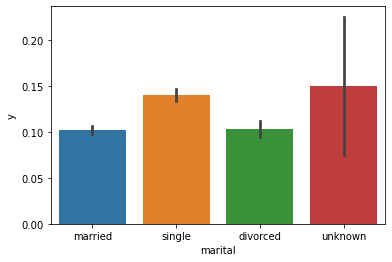

In [24]:
sns.barplot(x=data["marital"],y=data["y"],data=data)
# clients who are single are taking the more subscriptions compared to the married and the divorced

<AxesSubplot:xlabel='duration', ylabel='Count'>

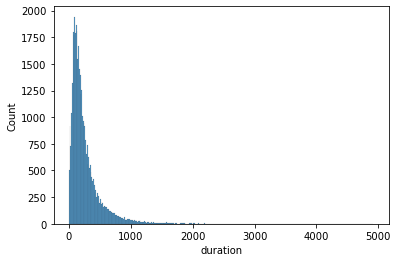

In [25]:
sns.histplot(data['duration'])
## duration of phone call between clinet and agent is mostly less than 1000 

In [26]:
temp = ["<30" if i<30 else "<40" if i<40 else "<50" if i<50 else "<60" for i in data["age"]]
k = pd.DataFrame(temp)
k[0].value_counts()
data["age_bucket"] = k[0]

<AxesSubplot:xlabel='age_bucket', ylabel='y'>

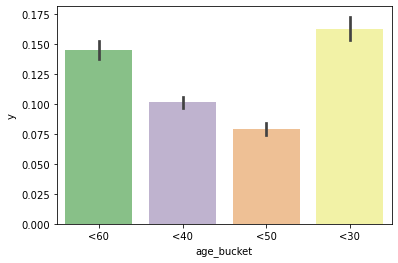

In [27]:
sns.barplot(x="age_bucket",y="y",data=data,palette = "Accent")
# the clients with age less than 30 are taking more subscriptions

In [28]:
del data["age_bucket"]

<AxesSubplot:xlabel='loan', ylabel='y'>

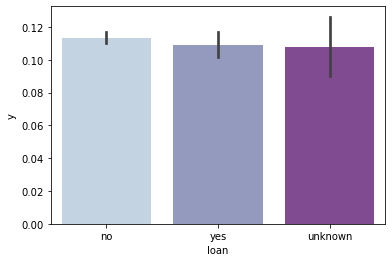

In [29]:
sns.barplot(x="loan",y="y",data=data,palette = "BuPu")
## the clients who already have personal loan taking less subscriptions##

clients who have housing loan

<AxesSubplot:xlabel='housing', ylabel='y'>

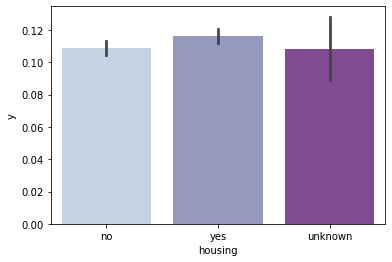

In [30]:
sns.barplot(x="housing",y="y",data=data,palette = "BuPu")
## the clients who already have housing loan taking more subscriptions 

current working job of client 

<AxesSubplot:xlabel='y', ylabel='job'>

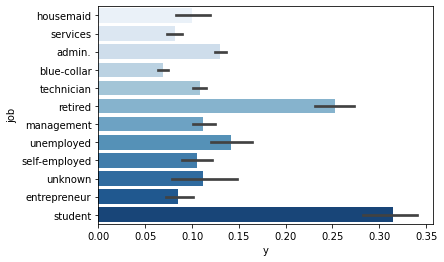

In [31]:
sns.barplot(y= 'job',x='y',data=data,palette="Blues")
## students are taking the more subscriptions

<AxesSubplot:xlabel='age', ylabel='y'>

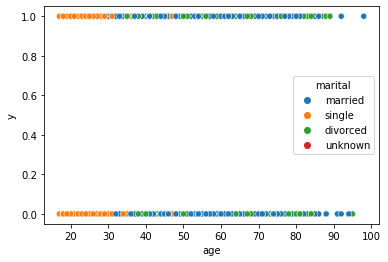

In [32]:
sns.scatterplot(x=data["age"],
                y=data["y"],hue=data["marital"])

### CLASS IMBALANCE PROBLEM

In [33]:
# the data set has more number of observations with the target variable as "0", causing a class imbalance problem. 
data_final["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [34]:
# Class count
count_class_0, count_class_1 = data_final.y.value_counts()


In [35]:
# Divide by class
df_class_0 = data_final[data_final['y'] == 0]
df_class_1 = data_final[data_final['y'] == 1]

# over sampling the minority class, i.e class 1, so that the counts of class 0 and class 1 are same.
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [36]:
df_test_over["y"].value_counts()

0    36548
1    36548
Name: y, dtype: int64

### TRAIN TEST SPLIT

In [37]:
x = df_test_over.iloc[:,:-1]
y = df_test_over.iloc[:,-1]

In [38]:
x.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,1,0,0,0,0,1,6,1,1,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,7,1,3,1,0,0,1,6,1,1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,7,1,3,0,2,0,1,6,1,1,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,0,1,1,0,0,0,1,6,1,1,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,7,1,3,0,0,2,1,6,1,1,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [39]:
import sklearn 
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size = 0.70,test_size = 0.30,random_state=10)

### FEATURE SCALING

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### MODEL DEVELOPMENT

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### LOGISTIC REGRESSION

In [45]:
model = LogisticRegression()
#model = LinearRegression()
#model = RandomForestClassifier()
model.fit(scaled_X_train,y_train)

LogisticRegression()

In [46]:
y_test_pred = model.predict(scaled_X_test)
y_test_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
model.coef_

array([[ 0.03937305,  0.08604957,  0.15214149, -0.14544013,  0.00814727,
        -0.03339244, -0.23513162, -0.47686132,  0.06442591,  0.22704884,
         0.10716212,  2.43925587, -0.05787088, -0.34009907, -0.04696756,
        -2.54516622,  0.18124373, -0.18311033,  3.18228079, -2.43307147]])

In [48]:
confusion_matrix(y_test_pred, y_test)

array([[9314, 1384],
       [1637, 9594]], dtype=int64)

In [49]:
from sklearn import metrics
from sklearn.metrics import accuracy_score # accuracy

In [50]:
print(sklearn.metrics.accuracy_score(y_test_pred, y_test))
#Accuracy = sklearn.metrics.r2_score(ytest,ypred)
#print(Accuracy)

0.8622372201194765


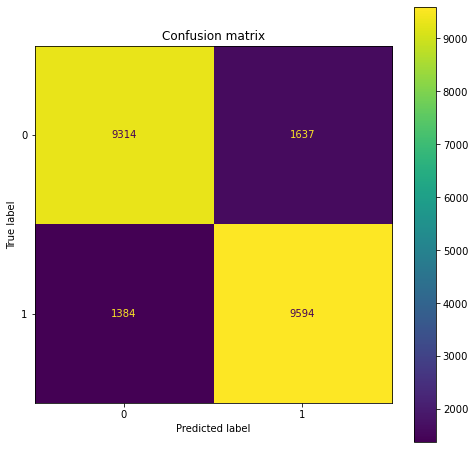

<Figure size 432x288 with 0 Axes>

In [51]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(model,scaled_X_test,y_test,ax=ax)
plt.title('Confusion matrix')
plt.show()
plt.savefig('confusion_matrix.jpg')

In [52]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     10951
           1       0.85      0.87      0.86     10978

    accuracy                           0.86     21929
   macro avg       0.86      0.86      0.86     21929
weighted avg       0.86      0.86      0.86     21929



#### RANDOM FOREST

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
final_model = RandomForestClassifier()
final_model.fit(scaled_X_train,y_train)

RandomForestClassifier()

In [55]:
yFinalPred = final_model.predict(scaled_X_test)
yFinalPred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
print(sklearn.metrics.accuracy_score(y_test,yFinalPred))

0.9650234848830316


In [57]:
RMSE = sklearn.metrics.mean_squared_error(y_test,yFinalPred)
print(RMSE)

0.0349765151169684


In [58]:
confusion_matrix(y_test, yFinalPred)

array([[10209,   742],
       [   25, 10953]], dtype=int64)

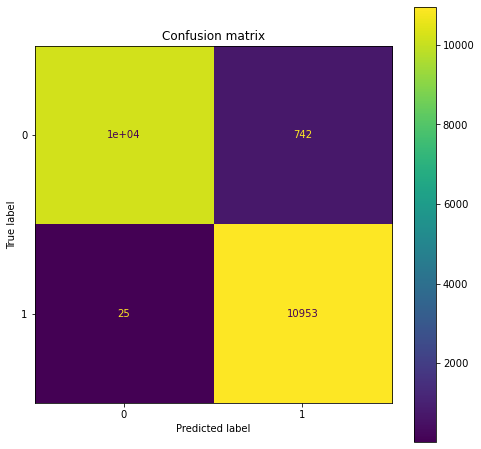

<Figure size 432x288 with 0 Axes>

In [59]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(final_model,scaled_X_test,y_test,ax=ax)
plt.title('Confusion matrix')
plt.show()
plt.savefig('confusion_matrix.jpg')

In [60]:
print(classification_report(y_test, yFinalPred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     10951
           1       0.94      1.00      0.97     10978

    accuracy                           0.97     21929
   macro avg       0.97      0.96      0.96     21929
weighted avg       0.97      0.97      0.96     21929



**LogisticRegression**

*   Accuracy - 0.8634684664143372

**RandomForest**

*   Accuracy - 0.9668475534680104


